In [1]:
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt


In [2]:
# dataset

char = "A   B   C   D   E   F   G   H   I   J   K   L   M   N   O   P   Q   R   S   T   U   V   W   X   Y   Z"
char = char.split('   ')


In [3]:
def one_hot(val):
    output = np.zeros(len(char))
    
    output[val] = 1
    
    return output

In [4]:
window_size = 2
def window(a, step=1):
    n = len(a)
    return [a[i:i+window_size+1:step] for i in range(n) if len(a[i:i+3:step]) == 3 ]

In [5]:
# generate the training data

class dataset(Dataset):
    def __init__(self,char):
        self.char = char
        self.num = {self.char[i]:i for i in range(len(self.char)) }
        
        
    def ds(self):

        # window step size 1
        win = window(self.char)

        # convert one hot
        def convert(win):
            all_data = []
            for i in win:
                win_data = []
                for val in i:
                    win_data.append(one_hot(self.num[val]))
                all_data.append(win_data)

            return np.array(all_data)

        return convert(win)
    
    
    def __len__(self):
        return self.ds().shape[0]
    
    
    def __getitem__(self,idx):
        
        output = self.ds()
        return torch.tensor(output[idx]).float()



In [6]:
class word2vec(nn.Module):
    def __init__(self):
        super(word2vec,self).__init__()
        
        self.h1 = nn.Linear(26,10)
        self.h2 = nn.Linear(10,26)
        self.soft = nn.Softmax()

    def forward(self,w1,w2):
        
        # sum w1 and w2 then linear
        output = w1+w2
        output = self.h1(output)
        output = self.h2(output)
        
        return self.soft(output)
    

In [7]:
network = word2vec()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(network.parameters())

In [11]:
# training
dset = dataset(char)
load = DataLoader(dset,batch_size=3)
loss_=[]
for x in range(100):
    for i,data in enumerate(load):

        X1 = data[:,0,:]
        X2 = data[:,1,:]
        y  = data[:,2,:]

        output = network(X1,X2)

        loss = criterion(output,torch.argmax(y,dim=1))
        
        if x % 10 == 0:
        
            loss_.append(loss.item())

        #print(loss)
        optimizer.zero_grad()
        loss.backward()

        optimizer.step()      
        #print(loss)

<ipython-input-6-da328ef4bb4e>:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.soft(output)


In [12]:
%matplotlib inline

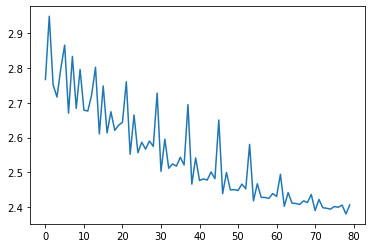

In [13]:
plt.plot(loss_)